In [72]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

In [79]:
class CustomEnv:
    def __init__(self):
    
        # a 6x6 grid as the environment
        self.grid = np.zeros((6, 6))
        self.grid_size = (6, 6)

        # define initial position
        self.agent_position = (5, 0)

        self.path = self.generate_path()
        self.path_index = 0  # To keep track of the agent's position in the path
        self.charged = False # flag if robot has turned around to charge during the run

    def generate_path(self):
        path = []
        rows, cols = self.grid_size
        
        # Start at the bottom-left corner of the grid (start position)
        current_position = (rows - 1, 0)
        
        # Loop to move right and left while moving up after each row
        while current_position[0] >= 0:
            # check if position is the point to turn around
            if current_position == (2,0):
                # move down to start position then move back up
                for row in range(4):
                    current_position = (current_position[0]+1,0)
                    path.append((row, current_position[1]))
                self.charged = True
                # move back up
                for row in range(4):
                    current_position = (current_position[0]+1,0)
                    path.append(row, current_position[1])
            # Move right until we hit the right border
            for col in range(current_position[1], cols):
                path.append((current_position[0], col))
            
            # Move up one row if not yet on the top row
            if current_position[0] > 0:
                current_position = (current_position[0] - 1, cols - 1)  # Move up and to the far right
            else:
                break

            # Move left until we hit the left border
            for col in range(current_position[1], -1, -1):
                path.append((current_position[0], col))
            
            # Move up one row if not yet on the top row
            if current_position[0] > 0:
                current_position = (current_position[0] - 1, 0)  # Move up and to the far left
            else:
                break
            


        return path

    def step(self):
        # Move the agent along the path
        if self.path_index < len(self.path) - 1:
            self.path_index += 1
            self.agent_position = self.path[self.path_index]

    def reset(self):
        # Reset agent to original position
        self.agent_position = (5, 0)

    def render(self):
        self.grid = np.zeros((6, 6))  # Reset grid to zeros before rendering
        self.grid[self.agent_position] = 1
        return self.grid


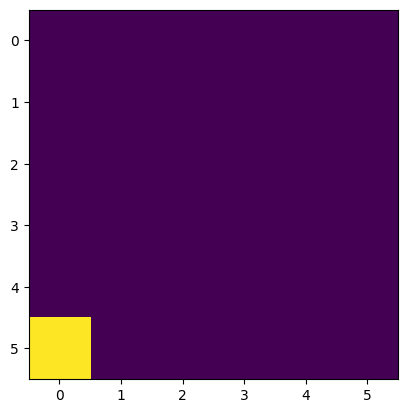

In [80]:
env = CustomEnv()
env.reset()
#env.render()
plt.imshow(env.render())
plt.show()

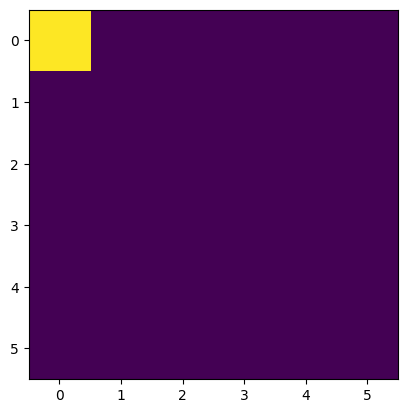

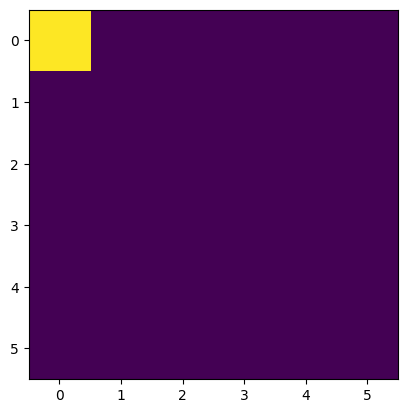

In [81]:
# Iterate through the path and move the agent
for i in range(len(env.path)):
    # Perform a step in the path (move to the next position)
    env.step()
    
    # Render the grid and update the display
    plt.imshow(env.render())
    display.clear_output(wait=True)  # Clear the output so the display updates
    display.display(plt.gcf())  # Display the updated grid
    
    time.sleep(0.1)  # Pause for a moment to make the movement visible